In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('C:/Users/sokolovae/Documents/project/visits_log.csv')
orders = pd.read_csv('C:/Users/sokolovae/Documents/project/orders_log.csv')
cost = pd.read_csv('C:/Users/sokolovae/Documents/project/costs.csv')

In [3]:
visits.head()

,Unnamed: 0,Uid,Device,End Ts,Source Id,Start Ts
0,0,16879256277535980062,touch,20.12.2017 17:38,4,20.12.2017 17:20
1,1,104060357244891740,desktop,19.02.2018 17:21,2,19.02.2018 16:53
2,2,7459035603376831527,touch,01.07.2017 1:54,5,01.07.2017 1:54
3,3,16174680259334210214,desktop,20.05.2018 11:23,9,20.05.2018 10:59
4,4,9969694820036681168,desktop,27.12.2017 14:06,3,27.12.2017 14:06


In [4]:
del visits['Unnamed: 0']

In [5]:
visits.head()

,Uid,Device,End Ts,Source Id,Start Ts
0,16879256277535980062,touch,20.12.2017 17:38,4,20.12.2017 17:20
1,104060357244891740,desktop,19.02.2018 17:21,2,19.02.2018 16:53
2,7459035603376831527,touch,01.07.2017 1:54,5,01.07.2017 1:54
3,16174680259334210214,desktop,20.05.2018 11:23,9,20.05.2018 10:59
4,9969694820036681168,desktop,27.12.2017 14:06,3,27.12.2017 14:06


In [6]:
del orders['Unnamed: 0']
del cost['Unnamed: 0']

In [7]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [8]:
cost.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358532 entries, 0 to 358531
Data columns (total 5 columns):
Uid          358532 non-null uint64
Device       358532 non-null object
End Ts       358532 non-null object
Source Id    358532 non-null int64
Start Ts     358532 non-null object
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [10]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Для удобства в вычислениях переименуем столбцы в таблицах:

In [12]:
visits.columns

Index(['Uid', 'Device', 'End Ts', 'Source Id', 'Start Ts'], dtype='object')

In [13]:
visits.columns = ['uid', 'device','end_ts', 'source_id', 'start_ts']

In [14]:
orders.columns = ['orders_date', 'revenue', 'uid']

In [15]:
cost.columns = ['source_id','cost_date', 'costs']

In [16]:
cost.sample(5)

,source_id,cost_date,costs
1093,4,2017-06-05,44.65
846,3,2017-09-29,421.28
2297,10,2017-09-27,17.71
2150,9,2018-05-03,8.89
2139,9,2018-04-22,16.81


In [17]:
visits.head()

,uid,device,end_ts,source_id,start_ts
0,16879256277535980062,touch,20.12.2017 17:38,4,20.12.2017 17:20
1,104060357244891740,desktop,19.02.2018 17:21,2,19.02.2018 16:53
2,7459035603376831527,touch,01.07.2017 1:54,5,01.07.2017 1:54
3,16174680259334210214,desktop,20.05.2018 11:23,9,20.05.2018 10:59
4,9969694820036681168,desktop,27.12.2017 14:06,3,27.12.2017 14:06


Приведем столбы с датами в таблицах в формат даты:

In [18]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%d.%m.%Y %H:%M')

In [19]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%d.%m.%Y %H:%M')

In [20]:
cost['cost_date'] = pd.to_datetime(cost['cost_date'], format = '%Y.%m.%d')

In [21]:
orders['orders_date'] = pd.to_datetime(orders['orders_date'], format='%Y-%m-%dT%H:%M:%S')

In [22]:
visits['start_ts'].describe()

count                  358532
unique                 223977
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object

Проверим данные на наличие дубликатов:

In [23]:
visits.duplicated().sum()

0

In [24]:
cost.duplicated().sum()

0

In [25]:
orders.duplicated().sum()

0

Для последующего анализа была проведена преобработка данных, в результате которой данные были приведены к соответствующему формату, для удобства были перименованы столбцы в таблицах.

Создадим столбцы с категоризацией даты по периодам(день, месяц, неделя):

In [26]:
visits['start_ts_day'] = visits['start_ts'].astype('datetime64[D]')

In [27]:
visits['start_ts_week'] = visits['start_ts'].astype('datetime64[W]')

In [28]:
visits['start_ts_month'] = visits['start_ts'].astype('datetime64[M]')

In [29]:
visits.head()

,uid,device,end_ts,source_id,start_ts,start_ts_day,start_ts_week,start_ts_month
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,2017-12-20,2017-12-14,2017-12-01
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,2018-02-19,2018-02-15,2018-02-01
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,2018-05-20,2018-05-17,2018-05-01
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,2017-12-27,2017-12-21,2017-12-01


Найдем среднее количество пользователей в день:

In [169]:
visits.groupby(['start_ts_day'])['uid'].agg({'uid':'nunique'}).reset_index().mean()

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


uid    907.991758
dtype: float64

Найдем среднее количество пользователей в неделю:

In [176]:
visits.groupby(['start_ts_week'])['uid'].agg({'uid':'nunique'}).reset_index().mean()

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


uid    5724.415094
dtype: float64

Найдем среднее количество пользователей в месяц:

In [175]:
visits.groupby(['start_ts_month'])['uid'].agg({'uid':'nunique'}).reset_index().mean()

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


uid    23228.416667
dtype: float64

Посчитаем среднее количество сессий в день:

In [174]:
visits.groupby(['start_ts_day'])['uid'].agg({'uid':'count'}).reset_index().mean()

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


uid    984.978022
dtype: float64

In [39]:
visits_per_day_session['uid'].mean()

984.978021978022

In [40]:
visits_per_day_session['start_ts_day'] = visits_per_day_session['start_ts_day'].dt.strftime('%Y-%m')

Как видно из расчетов число сессий больше, чем число уникальных ползователей. Это значит, что некоторые пользователи использовали продукт несколько раз.

Посмотрим на распределение пользователей по месяцам:

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


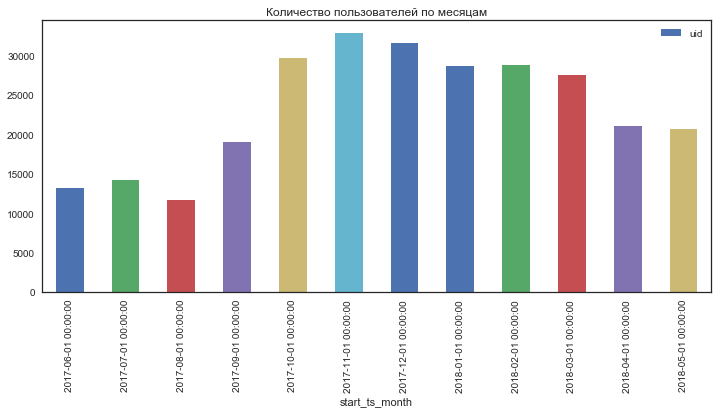

In [178]:
(visits.groupby(['start_ts_month'])['uid'].agg({'uid':'nunique'}).reset_index()
.plot(kind = 'bar', x= 'start_ts_month', y = 'uid', figsize = (12,5), title = 'Количество пользователей по месяцам' ))

Как видно из графика общее количество пользователей продукта, начиная с 09.2017, плавно растет, в сезонные месяцы особенно.

Добавим в таблицу время сессии пользователей:

In [42]:
visits['session'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [43]:
visits.sample()

,uid,device,end_ts,source_id,start_ts,start_ts_day,start_ts_week,start_ts_month,session
75793,8220395647602560250,desktop,2017-11-18 13:04:00,3,2017-11-18 13:03:00,2017-11-18,2017-11-16,2017-11-01,60


In [44]:
visits['session'].describe()

count    358532.000000
mean        645.018408
std        1017.099127
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session, dtype: float64

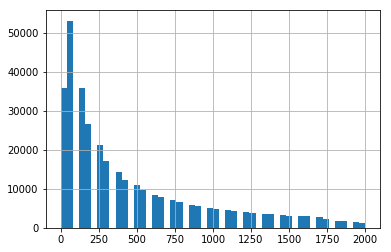

In [45]:
visits['session'].hist(bins=50, range = (0, 2000))

In [46]:
visits['session'].mode() # мода времени сессии

0    60
dtype: int64

In [47]:
visits_pivot = visits.pivot_table(index = 'uid', columns = 'device', values = 'session', aggfunc = 'count').reset_index()

In [48]:
visits_pivot.head()

device,uid,desktop,touch
0,11863502262781,NaN,1.0
1,49537067089222,NaN,1.0
2,297729379853735,1.0,NaN
3,313578113262317,3.0,NaN
4,325320750514679,2.0,NaN


In [49]:
visits_pivot.fillna(0, inplace = True)

In [50]:
visits_pivot['all'] = visits_pivot['desktop'] + visits_pivot['touch']

In [51]:
visits_pivot.sample(5)

device,uid,desktop,touch,all
111426,9006500619744714158,0.0,1.0,1.0
131724,10636159332373165483,1.0,0.0,1.0
9872,806834119734841574,0.0,1.0,1.0
60569,4899733008427921830,1.0,0.0,1.0
36742,2971966943663194105,1.0,0.0,1.0


Найдем количество уникальных пользователей:

In [52]:
visits_pivot['uid'].count()

228169

Найдем количество пользователей, у которых было 2 и более сессий:

In [53]:
visits_pivot.query('all > 1')['uid'].count()

51586

Вычислим долю пользователей, у которых было 2 и более сессий:

In [54]:
visits_pivot.query('all > 1')['uid'].count()/visits_pivot['uid'].count()

0.22608680407943235

Если брать вцелом, то почти 23% пользователей заходят на сайт 2 и более раз

Посмотрим распределение пользователей по источнику:

In [55]:
visits['device'].value_counts('%')

desktop    0.730515
touch      0.269485
Name: device, dtype: float64

73% пользователей заходят на сайт со стационарного комюютера, остальные с мобильного устройства.

Посчитаем долю пользователей, заходивших на сайт не менее 1 раза только с помощью мобильного устройства:

In [56]:
visits_pivot.query('desktop == 0 and all > 1')['uid'].count()/visits_pivot['uid'].nunique()

0.04630339791996283

Посчитаем долю пользователей, заходивших на сайт не менее 1 раза только со стационарного компьютера:

In [57]:
visits_pivot.query('touch == 0 and all > 1')['uid'].count()/visits_pivot['uid'].nunique()

0.14604087321239959

Посчитаем долю пользователей, заходивших на сайт не менее 1 раза со стационарного компьютера и с мобильного устройства:

In [156]:
visits_pivot.query('touch > 0 and desktop > 0')['uid'].count()/visits_pivot['uid'].nunique()

0.033742532947069935

Для наглядности построим график распределения пользователей по столбцу 'device':

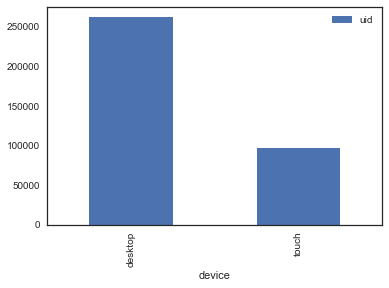

In [167]:
visits.groupby('device',as_index=False)['uid'].count().plot(kind ='bar', x = 'device')

Посчитаем Retention Rate для посетелей сайта:

In [59]:
visits.head()

,uid,device,end_ts,source_id,start_ts,start_ts_day,start_ts_week,start_ts_month,session
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,2017-12-20,2017-12-14,2017-12-01,1080
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,2018-02-19,2018-02-15,2018-02-01,1680
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,0
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,2018-05-20,2018-05-17,2018-05-01,1440
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,2017-12-27,2017-12-21,2017-12-01,0


Найдем начальный месяц посещения сайта каждого пользователя:

In [60]:
first_activity_month = visits.groupby(['uid'])['start_ts_month'].min()

In [61]:
first_activity_month.name = 'first_activity_month'

In [62]:
visits = visits.join(first_activity_month,on='uid')

In [63]:
visits.head()

,uid,device,end_ts,source_id,start_ts,start_ts_day,start_ts_week,start_ts_month,session,first_activity_month
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,2017-12-20,2017-12-14,2017-12-01,1080,2017-12-01
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,2018-02-19,2018-02-15,2018-02-01,1680,2018-02-01
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,2018-05-20,2018-05-17,2018-05-01,1440,2018-03-01
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,2017-12-27,2017-12-21,2017-12-01,0,2017-12-01


In [64]:
visits['cohort_lifetime'] = visits['start_ts_month'] - visits['first_activity_month']

In [65]:
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')

In [66]:
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype(int)

Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»:

In [67]:
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [68]:
cohorts.head()

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,2,713
2,2017-06-01,3,814
3,2017-06-01,4,909
4,2017-06-01,5,947


Найдём исходное количество пользователей в когорте:

In [69]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]

In [70]:
initial_users_count.head()

,first_activity_month,uid
0,2017-06-01,13259
10,2017-07-01,13140
19,2017-08-01,10181
28,2017-09-01,16704
34,2017-10-01,25977


In [71]:
initial_users_count.columns = ['first_activity_month', 'cohort_users']

In [72]:
initial_users_count.head()

,first_activity_month,cohort_users
0,2017-06-01,13259
10,2017-07-01,13140
19,2017-08-01,10181
28,2017-09-01,16704
34,2017-10-01,25977


In [73]:
cohorts = cohorts.merge(initial_users_count, on = 'first_activity_month')

Рассчитаем Retention Rate:

In [74]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [75]:
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

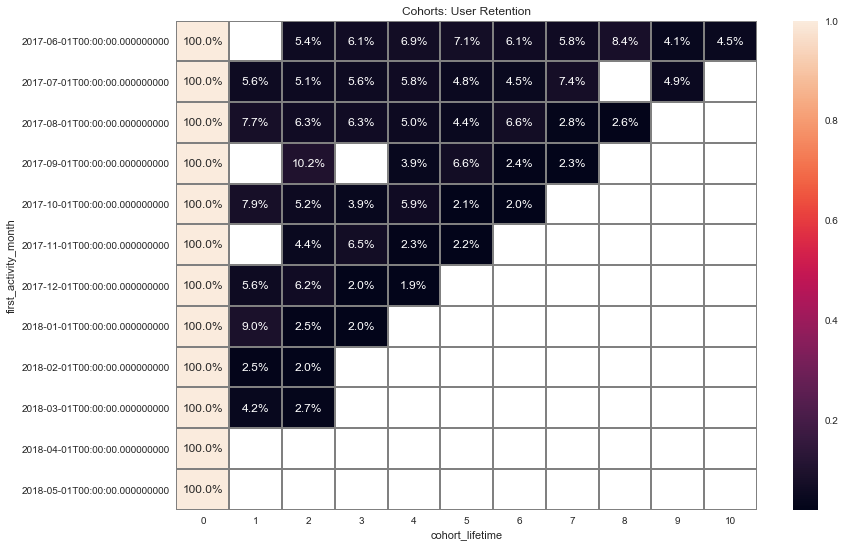

In [76]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')

Вывод:
- большинство сессий сайта(73%) были совершены с помощью стационарного компьютера;
- 14,6% от общего числа клиентов заходили на сайт повторно с помощью стационарного компьютера;
- 4,6% от общего числа клиентов заходили на сайт повторно с помощью мобильного устройства;
- 3,4% клиентов заходили на сайт с помощью обоих источников;
- если брать вцелом, то почти 23% пользователей заходят на сайт 2 и более раз

В среднем в день совершается 984 сессии, в неделю 5724, в месяц - 23228. Медианное время одной сессии - 5 минут, самое часто втречающееся значение времени одной сессии - 60 секунд

Судя по значениям Retention Rate пользователи все реже заходят на сайт.

Посмотрим на продажи Яндекс афиши.

In [77]:
orders.head()

,orders_date,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Найдем месяц первой покупки каждого полльзователя:

In [78]:
first_orders_dates = orders.groupby('uid')['orders_date'].min()

In [79]:
first_orders_dates.name = 'first_orders_date'

In [80]:
orders = orders.join(first_orders_dates, on = 'uid')

In [81]:
orders['orders_month'] = orders['orders_date'].astype('datetime64[M]')

In [82]:
orders['first_orders_month'] = orders['first_orders_date'].astype('datetime64[M]')

In [83]:
orders.head()

,orders_date,revenue,uid,first_orders_date,orders_month,first_orders_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


Посчитаем количество покупателей в каждом месяце и выручку каждой группы по месяцам:

In [84]:
cohort_stats = orders.groupby('first_orders_month').agg({'uid':'nunique','revenue':'sum'}).reset_index()

In [85]:
cohort_stats

,first_orders_month,uid,revenue
0,2017-06-01,2023,24031.69
1,2017-07-01,1923,16127.92
2,2017-08-01,1370,11606.26
3,2017-09-01,2581,34676.32
4,2017-10-01,4340,27603.45
5,2017-11-01,4081,26098.99
6,2017-12-01,4383,33485.74
7,2018-01-01,3373,16663.13
8,2018-02-01,3651,16750.50
9,2018-03-01,3533,19273.41


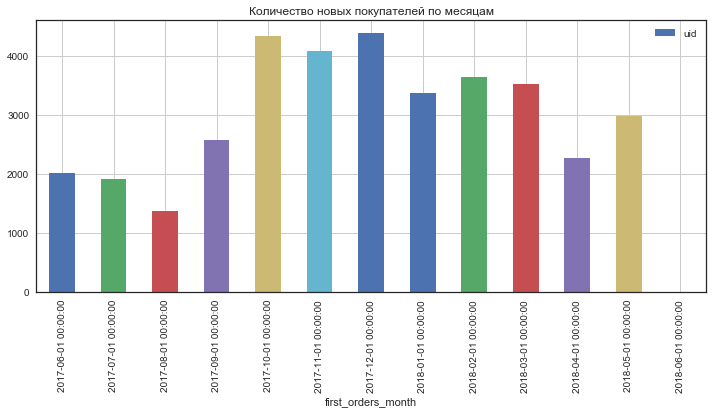

In [86]:
(cohort_stats
 .plot(kind = 'bar', x= 'first_orders_month', y = 'uid', 
       figsize = (12,5),grid = True, title = 'Количество новых покупателей по месяцам')
)

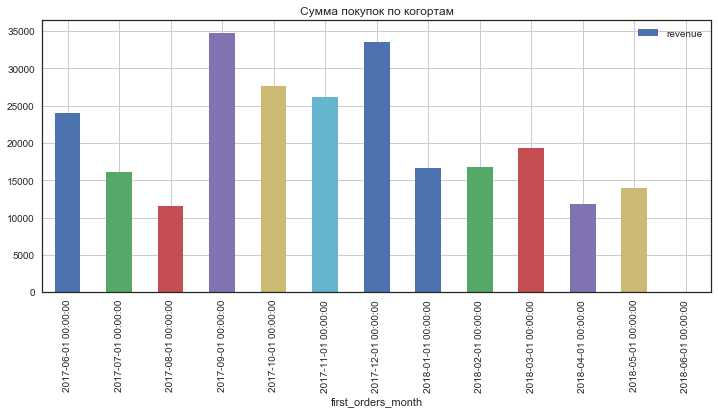

In [87]:
(cohort_stats
 .plot(kind = 'bar', x= 'first_orders_month', y = 'revenue', figsize = (12,5), 
       grid = True, title = 'Сумма покупок по когортам')
)

Судя по графикам количество новых покупателей, начиная с 09.2017, в сезонные месяцы выросло, и начиная с апреля 2018, находится примерно на одном уровне.

Самые большие покупки были совершены покупателями когорт сентября - декабря 2017 года, остальные когорты находятся на одном уровне.

Посчитаем средний чек покупателей в зависимости от когорты:

In [88]:
orders_grouped_by_cohorts = orders.groupby(['first_orders_month','orders_month']).agg({'revenue':'sum','uid':'nunique'}).reset_index()

In [89]:
orders_grouped_by_cohorts.head()

,first_orders_month,orders_month,revenue,uid
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,61
2,2017-06-01,2017-08-01,885.34,50
3,2017-06-01,2017-09-01,1931.30,54
4,2017-06-01,2017-10-01,2068.58,88


In [90]:
orders_grouped_by_cohorts['ltv'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']

Построим сводную таблицу изменения среднего чека в когортах по месяцу совершения покупки и оценим, как изменяется средний чек с течением времени:

In [91]:
orders_grouped_by_cohorts.pivot_table(index='first_orders_month',columns='orders_month',values='ltv',aggfunc='mean')

orders_month,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00
first_orders_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


Найдем "время жизни" каждой когорты покупателей, т.е. время, прошедшедшее с момента первой покупки по месяцам:

In [92]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['orders_month'] - orders_grouped_by_cohorts['first_orders_month']

In [93]:
orders_grouped_by_cohorts.head()

,first_orders_month,orders_month,revenue,uid,ltv,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0 days
1,2017-06-01,2017-07-01,981.82,61,16.095410,30 days
2,2017-06-01,2017-08-01,885.34,50,17.706800,61 days
3,2017-06-01,2017-09-01,1931.30,54,35.764815,92 days
4,2017-06-01,2017-10-01,2068.58,88,23.506591,122 days


In [94]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')

In [95]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')

In [96]:
orders_grouped_by_cohorts.head()

,first_orders_month,orders_month,revenue,uid,ltv,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0
1,2017-06-01,2017-07-01,981.82,61,16.095410,1
2,2017-06-01,2017-08-01,885.34,50,17.706800,2
3,2017-06-01,2017-09-01,1931.30,54,35.764815,3
4,2017-06-01,2017-10-01,2068.58,88,23.506591,4


In [97]:
#orders_grouped_by_cohorts['first_orders_month'] = orders_grouped_by_cohorts['first_orders_month'].dt.strftime('%Y-%m')

Посчитаем ltv каждой когорты:

In [98]:
ltv = (orders_grouped_by_cohorts
 .pivot_table(index='first_orders_month',columns='cohort_lifetime',values='ltv',aggfunc='mean')
)

In [99]:
ltv

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_orders_month,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07-01,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09-01,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10-01,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11-01,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Визиализируем полученные данные с помощью тепловой карты библиотеки Seaborn

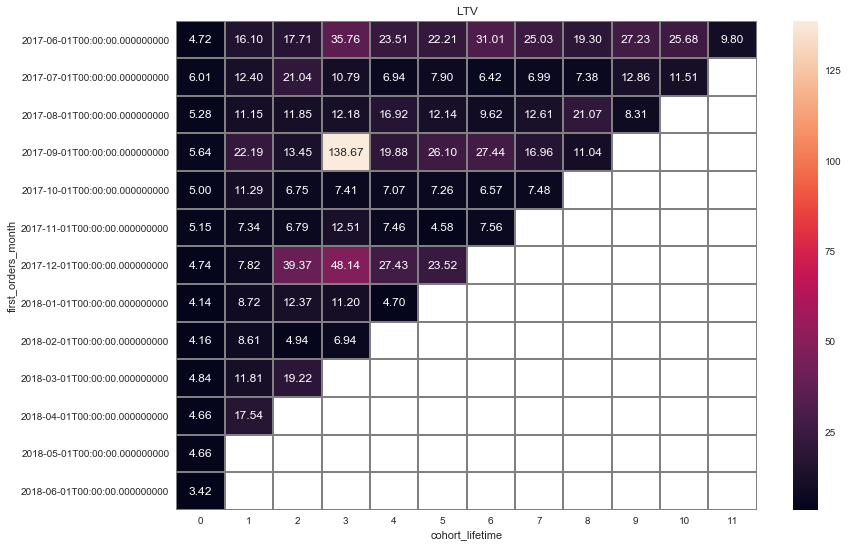

In [142]:
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(ltv, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

Средний чек каждой когорты покупателей отличается.

Судя по графику наиболее ценные клиенты принадлежат к группе покупателей, сделавших первые покупки в сентябре 2017 года. Именно эта группа сделала рекордную сумму покупок в декабре 2017 на 138,67.

Также неплохо идут продажи у когорт июня и декабря 2017 года. Отличаются в худшую сторону группы июля, октября и ноября 2017 года. В 2018 году по продажам заметно отстает когорта февраля месяца.

Рассмотрим предположение, что рекордный сбор сентябрьской когорты  - это выброс:

(array([155.,   6.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([3.000000e-02, 2.633550e+02, 5.266800e+02, 7.900050e+02,
        1.053330e+03, 1.316655e+03, 1.579980e+03, 1.843305e+03,
        2.106630e+03, 2.369955e+03, 2.633280e+03]),
 <a list of 10 Patch objects>)

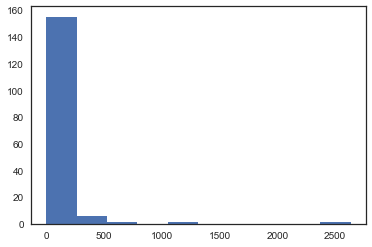

In [146]:
orders_new = orders.query('first_orders_month == "2017-09-01" and orders_month == "2017-12-01"')
plt.hist(orders_new['revenue'])

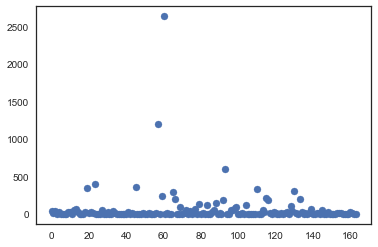

In [154]:
x_values = pd.Series(range(0,len(orders_new['revenue'])))
plt.scatter(x_values, orders_new['revenue'])

Судя по графикам действительно есть выбросы в покупках. Посмотрим на  перцентили сентябрьской когорты в декабре:

In [150]:
np.percentile(orders_new['revenue'], [90, 95, 99])

array([131.367 , 285.65  , 823.1525])

А теперь посмотрим перцентили всех когорт за весь период:

In [155]:
np.percentile(orders['revenue'], [90, 95, 99])

array([ 9.17, 13.75, 36.67])

Безусловно выбросы в сентябрьской когорте повлияли на статистику, но продажи этой когорты в декабре в любом случае значительно больше, чем вцелом по всем покупателям.

Рассчитаем САС и ROMI:

In [101]:
cost.head()

,source_id,cost_date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [102]:
cost['month'] = cost['cost_date'].astype('datetime64[M]')

In [103]:
cost.sample(5)

,source_id,cost_date,costs,month
83,1,2017-08-23,22.42,2017-08-01
513,2,2017-10-29,137.80,2017-10-01
1110,4,2017-06-22,102.29,2017-06-01
826,3,2017-09-09,330.87,2017-09-01
775,3,2017-07-20,179.74,2017-07-01


In [104]:
monthly_costs = cost.groupby('month')['costs'].sum().reset_index()

In [105]:
monthly_costs.head()

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


In [106]:
orders_grouped_by_cohorts.head()

,first_orders_month,orders_month,revenue,uid,ltv,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0
1,2017-06-01,2017-07-01,981.82,61,16.095410,1
2,2017-06-01,2017-08-01,885.34,50,17.706800,2
3,2017-06-01,2017-09-01,1931.30,54,35.764815,3
4,2017-06-01,2017-10-01,2068.58,88,23.506591,4


In [107]:
report = pd.merge(orders_grouped_by_cohorts, monthly_costs, left_on='first_orders_month', right_on='month')

Посчитаем САС:

In [108]:
report['cac'] = report['costs'] / report['uid']

Посчитаем ROMI:

In [109]:
report['romi'] = report['ltv'] / report['cac']

In [110]:
report.head()

,first_orders_month,orders_month,revenue,uid,ltv,cohort_lifetime,month,costs,cac,romi
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0,2017-06-01,18015.0,8.905091,0.530530
1,2017-06-01,2017-07-01,981.82,61,16.095410,1,2017-06-01,18015.0,295.327869,0.054500
2,2017-06-01,2017-08-01,885.34,50,17.706800,2,2017-06-01,18015.0,360.300000,0.049145
3,2017-06-01,2017-09-01,1931.30,54,35.764815,3,2017-06-01,18015.0,333.611111,0.107205
4,2017-06-01,2017-10-01,2068.58,88,23.506591,4,2017-06-01,18015.0,204.715909,0.114825


In [111]:
output = report.pivot_table(
        index='first_orders_month', 
        columns='cohort_lifetime', 
        values='romi', 
        aggfunc='mean')

In [112]:
romi = output.cumsum(axis=1).round(2)

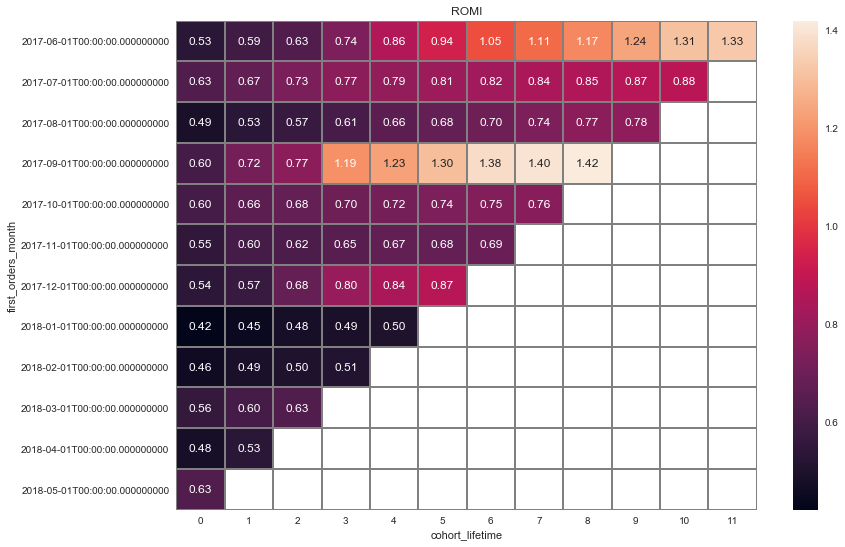

In [113]:
plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

Когорта июня 2017 года окупилась к 6 месяцу, когорта сентября окупилась на 4 месяце, остальные когорты до сих пор не окупились.

Посчитаем romi в среднем:

In [114]:
output.cumsum(axis=1).mean(axis=0).reset_index()

,cohort_lifetime,0
0,0,0.540816
1,1,0.581985
2,2,0.631069
3,3,0.719740
4,4,0.782946
5,5,0.859876
6,6,0.896819
7,7,0.969951
8,8,1.053871
9,9,0.964488


Согласно расчетам окупаемость клиентов наступает в среднем через 9 месяцев.

Посчитаем сколько всего потратили на маркетинг:

In [115]:
cost['costs'].sum()

329131.62

Посчитаем сколько потратили на маркетинг по источникам:

In [116]:
cost_gr = cost.groupby('source_id')['costs'].sum().reset_index()

In [117]:
cost_gr['cost_%'] = (cost_gr['costs'] / (cost_gr['costs'].sum())).round(4)*100

In [118]:
cost_gr

,source_id,costs,cost_%
0,1,20833.27,6.33
1,2,42806.04,13.01
2,3,141321.63,42.94
3,4,61073.60,18.56
4,5,51757.10,15.73
5,9,5517.49,1.68
6,10,5822.49,1.77


На третий источник ушла подавляющая часть бюджета маркетинга, на 9 и 10 источник ушло менее 2% на каждый

Найдем клиентов по источнику привлечения:

In [119]:
users = visits.sort_values('start_ts').groupby('uid').first().reset_index()

In [120]:
users.sample()

,uid,device,end_ts,source_id,start_ts,start_ts_day,start_ts_week,start_ts_month,session,first_activity_month,cohort_lifetime
89946,7264399291019066634,desktop,2018-01-31 16:33:00,2,2018-01-31 16:33:00,2018-01-31,2018-01-25,2018-01-01,0,2018-01-01,0


In [121]:
users['uid'].duplicated().sum()

0

Сгруппируем данные по клиентам из таблицы с продажами:

In [122]:
orders_gr = orders.groupby(['uid'])['revenue'].sum().reset_index()

In [123]:
orders_gr.sample()

,uid,revenue
25866,13062561278449895108,4.89


Соединим полученные таблицы:

In [124]:
users = users.merge(orders_gr,  on = 'uid')

In [125]:
users.head()

,uid,device,end_ts,source_id,start_ts,start_ts_day,start_ts_week,start_ts_month,session,first_activity_month,cohort_lifetime,revenue
0,313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,1080,2017-09-01,0,0.55
1,1575281904278712,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,240,2017-06-01,0,3.05
2,2429014661409475,desktop,2017-10-11 17:27:00,3,2017-10-11 17:14:00,2017-10-11,2017-10-05,2017-10-01,780,2017-10-01,0,73.33
3,2464366381792757,desktop,2018-01-27 20:13:00,5,2018-01-27 20:10:00,2018-01-27,2018-01-25,2018-01-01,180,2018-01-01,0,2.44
4,2551852515556206,desktop,2017-11-24 11:31:00,5,2017-11-24 11:22:00,2017-11-24,2017-11-23,2017-11-01,540,2017-11-01,0,10.99


Найдем, сколько всего клиентов принес нам каждый источник:

In [126]:
source = users.groupby('source_id').agg({'uid': 'count','revenue': 'sum'}).reset_index()

In [127]:
source

,source_id,uid,revenue
0,1,2920,29876.00
1,2,3497,46574.17
2,3,10464,54391.15
3,4,10280,56682.99
4,5,6960,54407.71
5,7,1,1.22
6,9,1074,5666.56
7,10,1327,4457.40


In [128]:
source.columns = ['source_id', 'users_count', 'revenue']

Посчитаем долю клиентов по каждому источнику:

In [129]:
source['users_count_%'] = (source['users_count'] / (source['users_count'].sum())).round(4)*100

Посчитаем выручку на 1 клиента по источнику:

In [130]:
source['revenue_per_user'] = source['revenue']/source['users_count']

Посчитаем долю выручки на 1 клиента по источнику:

In [131]:
source['revenue_%'] = (source['revenue']/(source['revenue'].sum())).round(4)*100

Присоединим таблицу с расходами:

In [132]:
df = source.merge(cost_gr, how = 'left', on = 'source_id')

Найдем расходы на 1 клиента по источнику:

In [133]:
df['cost_per_user'] = df['costs']/df['users_count']

In [134]:
df['romi_%'] = (df['revenue'] - df['costs'])/df['costs']*100

In [135]:
df.fillna('')

,source_id,users_count,revenue,users_count_%,revenue_per_user,revenue_%,costs,cost_%,cost_per_user,romi_%
0,1,2920,29876.00,7.99,10.231507,11.85,20833.3,6.33,7.13468,43.4052
1,2,3497,46574.17,9.57,13.318321,18.48,42806,13.01,12.2408,8.8028
2,3,10464,54391.15,28.65,5.197931,21.58,141322,42.94,13.5055,-61.5125
3,4,10280,56682.99,28.15,5.513910,22.49,61073.6,18.56,5.94101,-7.18905
4,5,6960,54407.71,19.06,7.817200,21.59,51757.1,15.73,7.43636,5.12125
5,7,1,1.22,0.00,1.220000,0.00,,,,
6,9,1074,5666.56,2.94,5.276127,2.25,5517.49,1.68,5.13733,2.70177
7,10,1327,4457.40,3.63,3.359005,1.77,5822.49,1.77,4.38771,-23.4451


Для большей наглядности поменяем столбцы местами:

In [136]:
df.columns

Index(['source_id', 'users_count', 'revenue', 'users_count_%',
       'revenue_per_user', 'revenue_%', 'costs', 'cost_%', 'cost_per_user',
       'romi_%'],
      dtype='object')

In [137]:
df = df[['source_id', 'users_count', 'revenue', 'costs', 'users_count_%', 'revenue_%', 'cost_%', 'revenue_per_user','cost_per_user', 'romi_%']]

In [138]:
df.fillna('')

,source_id,users_count,revenue,costs,users_count_%,revenue_%,cost_%,revenue_per_user,cost_per_user,romi_%
0,1,2920,29876.00,20833.3,7.99,11.85,6.33,10.231507,7.13468,43.4052
1,2,3497,46574.17,42806,9.57,18.48,13.01,13.318321,12.2408,8.8028
2,3,10464,54391.15,141322,28.65,21.58,42.94,5.197931,13.5055,-61.5125
3,4,10280,56682.99,61073.6,28.15,22.49,18.56,5.513910,5.94101,-7.18905
4,5,6960,54407.71,51757.1,19.06,21.59,15.73,7.817200,7.43636,5.12125
5,7,1,1.22,,0.00,0.00,,1.220000,,
6,9,1074,5666.56,5517.49,2.94,2.25,1.68,5.276127,5.13733,2.70177
7,10,1327,4457.40,5822.49,3.63,1.77,1.77,3.359005,4.38771,-23.4451


Построим графики распределения расходов на маркетинг и полученных показателей:

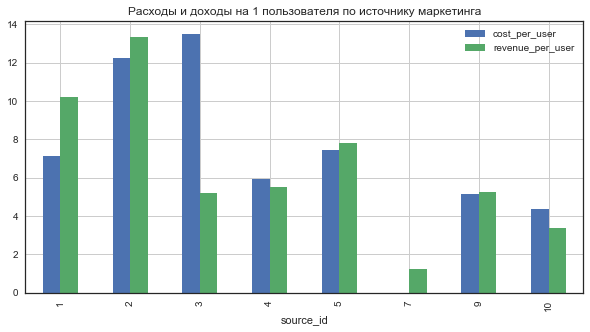

In [139]:
(df.plot(kind = 'bar', 
         x =  'source_id', y = ['cost_per_user', 'revenue_per_user'],
         figsize = (10,5), grid = True, title = 'Расходы и доходы на 1 пользователя по источнику маркетинга')
)

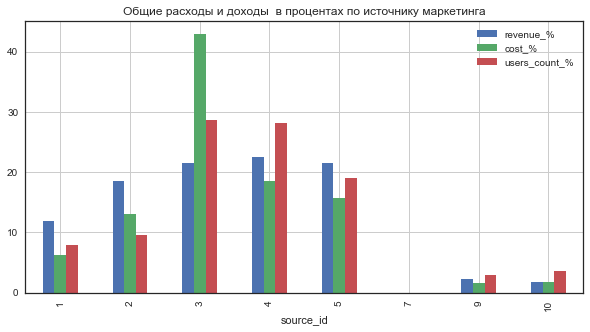

In [140]:
(df.plot(kind = 'bar', x =  'source_id', 
         y = ['revenue_%', 'cost_%', 'users_count_%'],figsize = (10,5), 
         grid = True, title = 'Общие расходы и доходы  в процентах по источнику маркетинга')
)

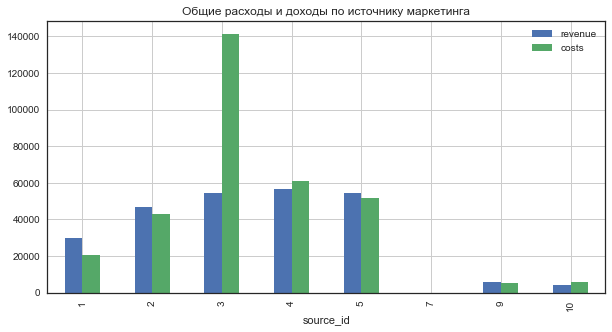

In [141]:
(df.plot(kind = 'bar', x =  'source_id', 
         y = ['revenue', 'costs'],figsize = (10,5), 
         grid = True, title = 'Общие расходы и доходы по источнику маркетинга')
)

Исходя из полученных результатов можно сделать следующие выводы по маркетинговой политике:

- несмотря на то, что большую часть бюджета маркетинга было вложено в третий источник, новых клиентов соразмерно потраченным средствам привлечено не было. Более того, в процентном соотношении потраченных денег на привлечение клиентов и дохода 3 источник наиболее убыточный.
- из наиболее перспективных и прибыльных источников можно выделить первый и второй источники, здесь показатель ROMI наиболее высок(43% и 8% соответственно).
- также хотелось бы выделить пятый источник, который показывает прибыльность и приносит большую часть клиентов(19%)

### ОБЩИЙ ВЫВОД:

Продукт:

- большинство сессий сайта(73%) были совершены с помощью стационарного компьютера;
- 14,6% от общего числа клиентов заходили на сайт повторно с помощью стационарного компьютера;
- 4,6% от общего числа клиентов заходили на сайт повторно с помощью мобильного устройства;
- 3,4% клиентов заходили на сайт с помощью обоих источников;
- если брать вцелом, то почти 23% пользователей заходят на сайт 2 и более раз

В среднем в день совершается 984 сессии, в неделю 5724, в месяц - 23228. Медианное время одной сессии - 5 минут, самое часто втречающееся значение времени одной сессии - 60 секунд

Судя по значениям Retention Rate пользователи все реже заходят на сайт.

Продажи:

- наиболее ценные клиенты принадлежат к группе покупателей, сделавших первые покупки в сентябре 2017 года. Именно эта группа сделала рекордную сумму покупок в декабре 2017 на 138,67.
- также неплохо идут продажи у когорт июня и декабря 2017 года. Отличаются в худшую сторону группы июля, октября и ноября 2017 года. В 2018 году по продажам заметно отстает когорта февраля месяца.
- когорта июня 2017 года окупилась к 6 месяцу, когорта сентября окупилась на 4 месяце, остальные когорты до сих пор не окупились.
- согласно расчетам окупаемость клиентов наступает в среднем через 9 месяцев.

Маркетинг:

- несмотря на то, что большую часть бюджета маркетинга было вложено в третий источник, новых клиентов соразмерно потраченным средствам привлечено не было. Более того, в процентном соотношении потраченных денег на привлечение клиентов и дохода 3 источник наиболее убыточный.
- из наиболее перспективных и прибыльных источников можно выделить первый и второй источники, здесь показатель ROMI наиболее высок(43% и 8% соответственно).
- также хотелось бы выделить пятый источник, который показывает прибыльность и приносит одну из самых больших долей клиентов(19%).

